# Sales Insight Case Study


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob as glob

In [44]:
path = './Sales_Data'
filenames = glob.glob(path + "/*.csv")
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

* Combine the data from the 12 months into a single spreadsheet
* Merges the data sets with pd.concat and ignore the index

In [45]:
data = pd.concat(dfs, ignore_index=True)

**Remove data with NaN**
**Clean up the data**

In [46]:
features = ['Order Date', 'Product', 'Quantity Ordered', 'Price Each', 'Purchase Address']
features

['Order Date', 'Product', 'Quantity Ordered', 'Price Each', 'Purchase Address']

In [47]:
cleanedData = data[features]
cleanedData

,Order Date,Product,Quantity Ordered,Price Each,Purchase Address
0,04/19/19 08:46,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN
2,04/07/19 22:30,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215"
3,04/12/19 14:38,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001"
4,04/12/19 14:38,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...
186845,09/17/19 20:56,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001"
186846,09/01/19 16:00,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016"
186847,09/23/19 07:39,iPhone,1,700,"220 12th St, San Francisco, CA 94016"
186848,09/19/19 17:30,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016"


In [48]:
# Drop rows with missing values
cleanedData = cleanedData.dropna()
# Drop rows that contain 'Order Date, Product, Quantity Ordered, Price Each, Purchase Address'
cleanedData = cleanedData[cleanedData['Order Date'] != 'Order Date']
cleanedData =  cleanedData[cleanedData['Product'] != 'Product']
cleanedData =  cleanedData[cleanedData['Quantity Ordered'] != 'Quantity Ordered']
cleanedData =  cleanedData[cleanedData['Price Each'] != 'Price Each']
cleanedData =  cleanedData[cleanedData['Purchase Address'] != 'Purchase Address']
cleanedData

,Order Date,Product,Quantity Ordered,Price Each,Purchase Address
0,04/19/19 08:46,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001"
2,04/07/19 22:30,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215"
3,04/12/19 14:38,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001"
4,04/12/19 14:38,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001"
5,04/30/19 09:27,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...
186845,09/17/19 20:56,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001"
186846,09/01/19 16:00,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016"
186847,09/23/19 07:39,iPhone,1,700,"220 12th St, San Francisco, CA 94016"
186848,09/19/19 17:30,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016"


In [49]:
cleanedData[cleanedData["Order Date"] == "Order Date"]

,Order Date,Product,Quantity Ordered,Price Each,Purchase Address


In [50]:
# get month from order date
cleanedData['Month'] = cleanedData['Order Date'].str[0:2]
cleanedData['Month'] = pd.to_numeric(cleanedData['Month'], errors='coerce')
cleanedData['Month'] = cleanedData['Month'].fillna(0).astype(int)
cleanedData

,Order Date,Product,Quantity Ordered,Price Each,Purchase Address,Month
0,04/19/19 08:46,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4
2,04/07/19 22:30,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4
3,04/12/19 14:38,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",4
4,04/12/19 14:38,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4
5,04/30/19 09:27,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...
186845,09/17/19 20:56,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",9
186846,09/01/19 16:00,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016",9
186847,09/23/19 07:39,iPhone,1,700,"220 12th St, San Francisco, CA 94016",9
186848,09/19/19 17:30,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",9


**Create a function to convert the months into strings**

In [51]:
# convert month in january to december to int
def convertMonth(month):
    if month == 1:
        return 'January'
    elif month == 2:
        return 'February'
    elif month == 3:
        return 'March'
    elif month == 4:
        return 'April'
    elif month == 5:
        return 'May'
    elif month == 6:
        return 'June'
    elif month == 7:
        return 'July'
    elif month == 8:
        return 'August'
    elif month == 9:
        return 'September'
    elif month == 10:
        return 'October'
    elif month == 11:
        return 'November'
    elif month == 12:
        return 'December'

In [52]:
cleanedData['Month'] = cleanedData['Month'].apply(convertMonth)
cleanedData

,Order Date,Product,Quantity Ordered,Price Each,Purchase Address,Month
0,04/19/19 08:46,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",April
2,04/07/19 22:30,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",April
3,04/12/19 14:38,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",April
4,04/12/19 14:38,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",April
5,04/30/19 09:27,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",April
...,...,...,...,...,...,...
186845,09/17/19 20:56,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",September
186846,09/01/19 16:00,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016",September
186847,09/23/19 07:39,iPhone,1,700,"220 12th St, San Francisco, CA 94016",September
186848,09/19/19 17:30,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",September


* Convert Quantity Ordered and Price Each to numeric

In [53]:
# convert quantity ordered and price each to int
cleanedData['Quantity Ordered'] = pd.to_numeric(cleanedData['Quantity Ordered'], errors='coerce').fillna(0).astype(int)
cleanedData['Price Each'] = pd.to_numeric(cleanedData['Price Each'], errors='coerce').fillna(0).astype(int)
cleanedData

,Order Date,Product,Quantity Ordered,Price Each,Purchase Address,Month
0,04/19/19 08:46,USB-C Charging Cable,2,11,"917 1st St, Dallas, TX 75001",April
2,04/07/19 22:30,Bose SoundSport Headphones,1,99,"682 Chestnut St, Boston, MA 02215",April
3,04/12/19 14:38,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",April
4,04/12/19 14:38,Wired Headphones,1,11,"669 Spruce St, Los Angeles, CA 90001",April
5,04/30/19 09:27,Wired Headphones,1,11,"333 8th St, Los Angeles, CA 90001",April
...,...,...,...,...,...,...
186845,09/17/19 20:56,AAA Batteries (4-pack),3,2,"840 Highland St, Los Angeles, CA 90001",September
186846,09/01/19 16:00,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016",September
186847,09/23/19 07:39,iPhone,1,700,"220 12th St, San Francisco, CA 94016",September
186848,09/19/19 17:30,34in Ultrawide Monitor,1,379,"511 Forest St, San Francisco, CA 94016",September


* Add Sales to the data set

In [54]:
# add sales column
cleanedData['Sales'] = cleanedData['Quantity Ordered'] * cleanedData['Price Each']
cleanedData


,Order Date,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales
0,04/19/19 08:46,USB-C Charging Cable,2,11,"917 1st St, Dallas, TX 75001",April,22
2,04/07/19 22:30,Bose SoundSport Headphones,1,99,"682 Chestnut St, Boston, MA 02215",April,99
3,04/12/19 14:38,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",April,600
4,04/12/19 14:38,Wired Headphones,1,11,"669 Spruce St, Los Angeles, CA 90001",April,11
5,04/30/19 09:27,Wired Headphones,1,11,"333 8th St, Los Angeles, CA 90001",April,11
...,...,...,...,...,...,...,...
186845,09/17/19 20:56,AAA Batteries (4-pack),3,2,"840 Highland St, Los Angeles, CA 90001",September,6
186846,09/01/19 16:00,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016",September,700
186847,09/23/19 07:39,iPhone,1,700,"220 12th St, San Francisco, CA 94016",September,700
186848,09/19/19 17:30,34in Ultrawide Monitor,1,379,"511 Forest St, San Francisco, CA 94016",September,379


In [55]:
# Month with highest sales
cleanedData.groupby('Month').sum()
cleanedData.groupby('Month').sum()
monthWithHighestSales = cleanedData.groupby('Month').sum().sort_values('Quantity Ordered', ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_3880\651408764.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cleanedData.groupby('Month').sum()
C:\Users\USER\AppData\Local\Temp\ipykernel_3880\651408764.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cleanedData.groupby('Month').sum()
C:\Users\USER\AppData\Local\Temp\ipykernel_3880\651408764.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthWithHighestSales = 

In [56]:
# what was the best month for sales? How much was earned that month?
monthWithHighestSales = monthWithHighestSales.reset_index()
monthWithHighestSales

,Month,Quantity Ordered,Price Each,Sales
0,December,28114,4569702,4591824
1,October,22703,3700299,3719205
2,April,20558,3354065,3374951
3,November,19798,3167467,3184394
4,May,18667,3122775,3138287
5,March,17005,2779903,2794068
6,July,16072,2621867,2635443
7,June,15253,2551984,2566187
8,February,13449,2179934,2191696
9,August,13448,2221451,2234194


<Axes: xlabel='Month'>

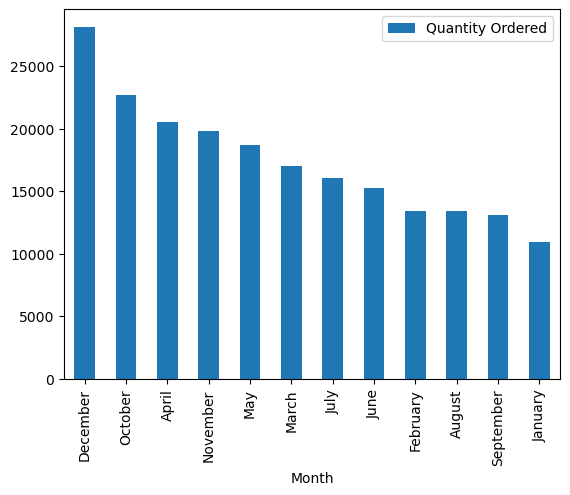

In [57]:
monthWithHighestSales.plot(x='Month', y='Quantity Ordered', kind='bar')

# What city sold the most products?

In [58]:
# What city had the highest number of sales?
# add city column
def getCity(address):
    return address.split(',')[1]


In [59]:
# add city column
cleanedData['City'] = cleanedData['Purchase Address'].str.split(',').str[1]
cleanedData

,Order Date,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City
0,04/19/19 08:46,USB-C Charging Cable,2,11,"917 1st St, Dallas, TX 75001",April,22,Dallas
2,04/07/19 22:30,Bose SoundSport Headphones,1,99,"682 Chestnut St, Boston, MA 02215",April,99,Boston
3,04/12/19 14:38,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",April,600,Los Angeles
4,04/12/19 14:38,Wired Headphones,1,11,"669 Spruce St, Los Angeles, CA 90001",April,11,Los Angeles
5,04/30/19 09:27,Wired Headphones,1,11,"333 8th St, Los Angeles, CA 90001",April,11,Los Angeles
...,...,...,...,...,...,...,...,...
186845,09/17/19 20:56,AAA Batteries (4-pack),3,2,"840 Highland St, Los Angeles, CA 90001",September,6,Los Angeles
186846,09/01/19 16:00,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016",September,700,San Francisco
186847,09/23/19 07:39,iPhone,1,700,"220 12th St, San Francisco, CA 94016",September,700,San Francisco
186848,09/19/19 17:30,34in Ultrawide Monitor,1,379,"511 Forest St, San Francisco, CA 94016",September,379,San Francisco


In [60]:
# get city with highest sales
cityWithHighestSales = cleanedData.groupby('City').sum().sort_values('Quantity Ordered', ascending=False)
cityWithHighestSales

C:\Users\USER\AppData\Local\Temp\ipykernel_3880\1928903852.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cityWithHighestSales = cleanedData.groupby('City').sum().sort_values('Quantity Ordered', ascending=False)


,Quantity Ordered,Price Each,Sales
City,,,
San Francisco,50239,8178055,8223669
Los Angeles,33289,5399261,5426973
New York City,27932,4616764,4642872
Boston,22528,3622510,3644327
Dallas,16730,2741555,2755117
Atlanta,16602,2768857,2782841
Seattle,16553,2722310,2735070
Portland,14053,2298450,2309717
Austin,11153,1802516,1811054


In [61]:
cityWithHighestSales.sort_values('Quantity Ordered', ascending=False)


,Quantity Ordered,Price Each,Sales
City,,,
San Francisco,50239,8178055,8223669
Los Angeles,33289,5399261,5426973
New York City,27932,4616764,4642872
Boston,22528,3622510,3644327
Dallas,16730,2741555,2755117
Atlanta,16602,2768857,2782841
Seattle,16553,2722310,2735070
Portland,14053,2298450,2309717
Austin,11153,1802516,1811054


<Axes: xlabel='City'>

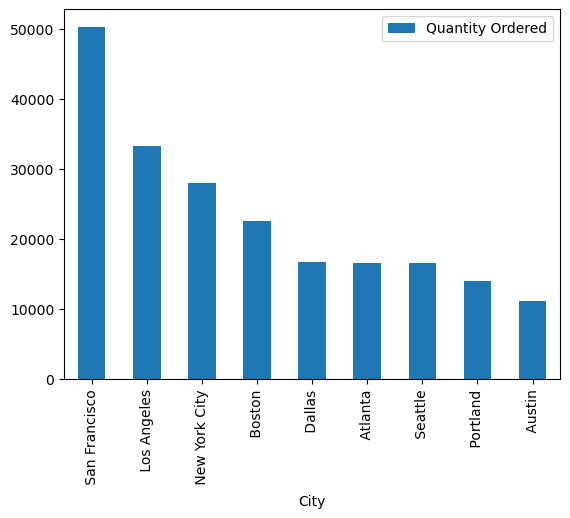

In [62]:
cityWithHighestSales = cityWithHighestSales.reset_index()
cityWithHighestSales.plot(x='City', y='Quantity Ordered', kind='bar')

# What time should we display advertisemens to maximize the likelihood of customer’s buying a product?

In [63]:
# add hour column
cleanedData['Hour'] = cleanedData['Order Date'].str.split(' ').str[1].str.split(':').str[0]
cleanedData

,Order Date,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Hour
0,04/19/19 08:46,USB-C Charging Cable,2,11,"917 1st St, Dallas, TX 75001",April,22,Dallas,08
2,04/07/19 22:30,Bose SoundSport Headphones,1,99,"682 Chestnut St, Boston, MA 02215",April,99,Boston,22
3,04/12/19 14:38,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",April,600,Los Angeles,14
4,04/12/19 14:38,Wired Headphones,1,11,"669 Spruce St, Los Angeles, CA 90001",April,11,Los Angeles,14
5,04/30/19 09:27,Wired Headphones,1,11,"333 8th St, Los Angeles, CA 90001",April,11,Los Angeles,09
...,...,...,...,...,...,...,...,...,...
186845,09/17/19 20:56,AAA Batteries (4-pack),3,2,"840 Highland St, Los Angeles, CA 90001",September,6,Los Angeles,20
186846,09/01/19 16:00,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016",September,700,San Francisco,16
186847,09/23/19 07:39,iPhone,1,700,"220 12th St, San Francisco, CA 94016",September,700,San Francisco,07
186848,09/19/19 17:30,34in Ultrawide Monitor,1,379,"511 Forest St, San Francisco, CA 94016",September,379,San Francisco,17


In [64]:
# group by hour
hourWithHighestSales = cleanedData.groupby('Hour').sum().sort_values('Quantity Ordered', ascending=False)
hourWithHighestSales

C:\Users\USER\AppData\Local\Temp\ipykernel_3880\681670055.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourWithHighestSales = cleanedData.groupby('Hour').sum().sort_values('Quantity Ordered', ascending=False)


,Quantity Ordered,Price Each,Sales
Hour,,,
19,14470,2388956,2401834
12,14202,2290511,2305962
11,14005,2279609,2289873
18,13802,2198498,2208735
20,13768,2259062,2271164
13,13685,2130632,2144832
14,12362,2064016,2074206
10,12308,1924427,1934780
21,12244,2022652,2032659


In [65]:
# get element by index
hourWithHighestSales.iloc[0]


Quantity Ordered      14470
Price Each          2388956
Sales               2401834
Name: 19, dtype: int32

<Axes: xlabel='Hour'>

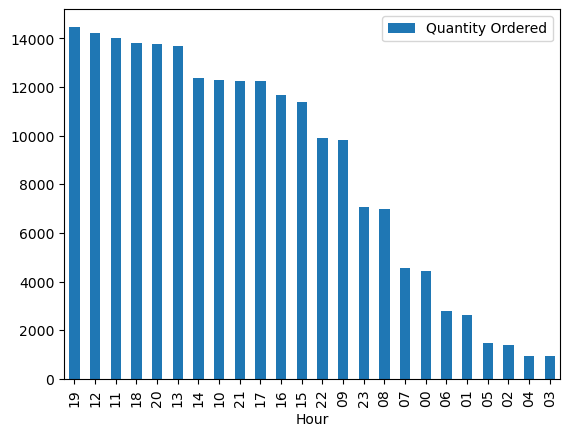

In [66]:
# plot hour with highest sales
hourWithHighestSales = hourWithHighestSales.reset_index()
hourWithHighestSales.plot(x='Hour', y='Quantity Ordered', kind='bar')

# What products are most often sold together?

In [80]:
new_data = data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']]

In [68]:
# What products are most often sold together?
# get all orders with same order id
new_data.groupby('Order ID',as_index=False, sort=False).sum()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google PhoneWired Headphones,11,60011.99,04/12/19 14:3804/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001669 Spruce..."
3,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
4,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
...,...,...,...,...,...,...
178433,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
178434,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
178435,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
178436,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [69]:
# if order id is duplicated, get product
get_duplicated = new_data[new_data.duplicated(subset=['Order ID'], keep=False)]
get_duplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
18,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301"
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301"
186826,NaN,NaN,NaN,NaN,NaN,NaN
186841,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"


In [70]:
#  what products are most often sold together?
get_duplicated['Grouped'] = get_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
get_duplicated

C:\Users\USER\AppData\Local\Temp\ipykernel_3880\2454583647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  get_duplicated['Grouped'] = get_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Grouped
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001","Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001","Google Phone,Wired Headphones"
18,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001","Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001","Google Phone,USB-C Charging Cable"
...,...,...,...,...,...,...,...
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301","Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301","Wired Headphones,AAA Batteries (4-pack)"
186826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186841,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016","Google Phone,USB-C Charging Cable"


In [71]:
# drop non duplicated rows
get_duplicated = get_duplicated[['Order ID', 'Grouped']].drop_duplicates()
get_duplicated

,Order ID,Grouped
1,NaN,NaN
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [72]:
# most often sold together
most_sold_together = get_duplicated.groupby('Grouped').count()
most_sold_together

,Order ID
Grouped,
"20in Monitor,20in Monitor",3
"20in Monitor,27in FHD Monitor",2
"20in Monitor,34in Ultrawide Monitor",1
"20in Monitor,AA Batteries (4-pack)",6
"20in Monitor,AAA Batteries (4-pack)",3
...,...
"iPhone,USB-C Charging Cable",12
"iPhone,Vareebadd Phone",3
"iPhone,Wired Headphones",361


In [73]:
most_sold_together.sort_values('Order ID', ascending=False)
monthWithHighestSales = monthWithHighestSales.reset_index()
monthWithHighestSales

,index,Month,Quantity Ordered,Price Each,Sales
0,0,December,28114,4569702,4591824
1,1,October,22703,3700299,3719205
2,2,April,20558,3354065,3374951
3,3,November,19798,3167467,3184394
4,4,May,18667,3122775,3138287
5,5,March,17005,2779903,2794068
6,6,July,16072,2621867,2635443
7,7,June,15253,2551984,2566187
8,8,February,13449,2179934,2191696
9,9,August,13448,2221451,2234194


# What product sold the most? Why do you think it sold the most?

In [74]:
# What product sold the most? Why do you think it sold the most?
# get product with highest sales
productWithHighestSales = cleanedData.groupby('Product').sum().sort_values('Sales', ascending=False)
productWithHighestSales

C:\Users\USER\AppData\Local\Temp\ipykernel_3880\628136907.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  productWithHighestSales = cleanedData.groupby('Product').sum().sort_values('Sales', ascending=False)


,Quantity Ordered,Price Each,Sales
Product,,,
Macbook Pro Laptop,4728,8030800,8037600
iPhone,6849,4789400,4794300
ThinkPad Laptop,4130,4123872,4125870
Google Phone,5532,3315000,3319200
27in 4K Gaming Monitor,6244,2423470,2428916
34in Ultrawide Monitor,6199,2342599,2349421
Apple Airpods Headphones,15661,2332350,2349150
Flatscreen TV,4819,1440000,1445700
Bose SoundSport Headphones,13457,1319175,1332243


In [75]:
productWithHighestSales.sort_values('Quantity Ordered', ascending=False)

,Quantity Ordered,Price Each,Sales
Product,,,
AAA Batteries (4-pack),31017,41282,62034
AA Batteries (4-pack),27635,61731,82905
USB-C Charging Cable,23975,240933,263725
Lightning Charging Cable,23217,303212,325038
Wired Headphones,20557,207702,226127
Apple Airpods Headphones,15661,2332350,2349150
Bose SoundSport Headphones,13457,1319175,1332243
27in FHD Monitor,7550,1118543,1124950
iPhone,6849,4789400,4794300


<Axes: xlabel='Product'>

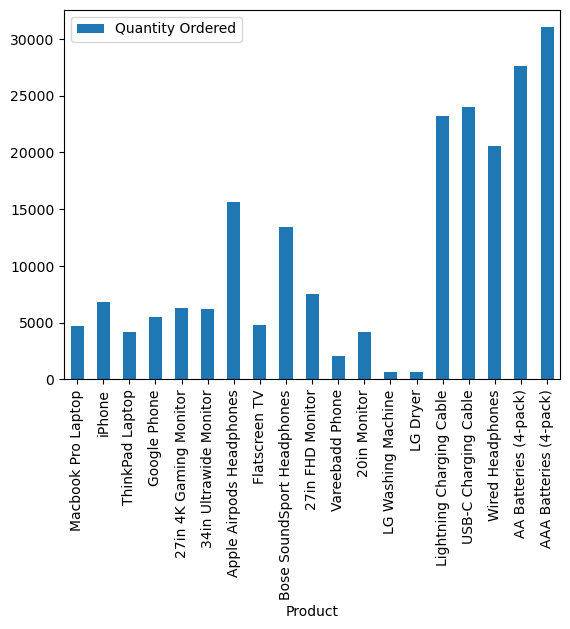

In [76]:
# plot product with highest sales
productWithHighestSales = productWithHighestSales.reset_index()
productWithHighestSales.plot(x='Product', y='Quantity Ordered', kind='bar')

In [77]:
# download csv
cleanedData.to_csv('cleanedData.csv')